In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
from keras import layers
from keras.models import Model
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import shuffle
import torch
warnings.filterwarnings('ignore')

In [ ]:
try:
    os.mkdir('cats-n-dogs')
except OSError:
    print('Failed to create folder')

In [5]:
import zipfile
from pathlib import Path

In [6]:
# Set the source and target directory
zip_path = Path.cwd()
out_path = Path('cats-n-dogs')

zip_files = ["test.zip", "train.zip"]

# Open the Zip file
for file in zip_files:
    with zipfile.ZipFile(os.path.join(zip_path,file),'r') as archive:
        archive.extractall(out_path)
    # Print a message indicating that the extraction is complete
    print(f'Extracted contents from {file} to {out_path}/{file.split(".")[0]} directory.')

Extracted contents from test.zip to cats-n-dogs/test directory.
Extracted contents from train.zip to cats-n-dogs/train directory.


In [7]:
Path.cwd()

WindowsPath('C:/Users/koloskov/Desktop/Нетология/18 компьютерое зрение/4 Сверточные нейронные сети/ДЗ/V3')

In [47]:
#check files location

for dirname,_,filenames in os.walk('cats-n-dogs'):
    print(dirname,": ", len(filenames))

cats-n-dogs :  0
cats-n-dogs\3 :  0
cats-n-dogs\3\test :  12500
cats-n-dogs\3\test1 :  5431
cats-n-dogs\3\test2 :  4569
cats-n-dogs\3\test3 :  2500
cats-n-dogs\test :  0
cats-n-dogs\test\test_sample :  17
cats-n-dogs\train :  0
cats-n-dogs\train\cat :  12500
cats-n-dogs\train\dog :  12500


In [9]:
#create seperate subfolder for eaсh class of train images

import shutil

train_dir = 'cats-n-dogs/train'

keywrd_1 = 'cat'
keywrd_2 = 'dog'
        
train_files = os.listdir(train_dir)

try:
    os.mkdir(os.path.join(train_dir, keywrd_1))
    os.mkdir(os.path.join(train_dir, keywrd_2))
except OSError:
    print('Failed to create folder.')
except FileExistsError:
    print('File/Folder already exists.')

In [10]:
# move images to created folders

for file in train_files:
    if "jpg" in file:  
        if keywrd_1 in file:
            shutil.move(os.path.join(train_dir, file), os.path.join(train_dir, keywrd_1, file))
        elif keywrd_2 in file:
            shutil.move(os.path.join(train_dir, file), os.path.join(train_dir, keywrd_2, file))

In [2]:
#create subfolder for test images for ImageDataGenerator

test_dir = 'cats-n-dogs/test'

try:
    os.mkdir(os.path.join(test_dir, "test"))
except OSError:
    print('Failed to create folder.')
except FileExistsError:
    print('File/Folder already exists.')
    

Failed to create folder.


In [3]:
test_files = os.listdir(test_dir)

In [13]:
# move images to created subfolder

for file in test_files:
    if "jpg" in file: 
        shutil.move(os.path.join(test_dir, file), os.path.join(test_dir,"test", file))

In [134]:
test_dir = 'cats-n-dogs/test'
test_files = os.listdir(os.path.join(test_dir,'test'))
# test_files = glob('/kaggle/working/cats-n-dogs/test/*/*.jpg')
len(test_files)

12500

In [2]:
train_path = 'cats-n-dogs/train'
test_path = 'cats-n-dogs/test/'

In [3]:
 #Create sets of augmented images

train_datagen = ImageDataGenerator(
        rescale= 1./ 255.,
        # rotation_range=20,
        # zoom_range=0.05,
        # horizontal_flip=True,
        # fill_mode="nearest",
        validation_split=0.20)

val_datagen = ImageDataGenerator(
        rescale=1./255.,
        validation_split=0.20)

test_datagen = ImageDataGenerator(
            rescale=1./255.)

In [4]:
batch_size = 32
img_shape = (224,224,3)

In [5]:
train_gen = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=img_shape[:2],
    color_mode="rgb",
    batch_size= batch_size,
    class_mode="binary",
    subset='training',
    shuffle=True,
    seed=42
)
val_gen = val_datagen.flow_from_directory(
    directory=train_path,
    target_size= img_shape[:2],
    color_mode="rgb",
    batch_size= batch_size,
    class_mode="binary",
    subset='validation',
    shuffle=True,
    seed=42
)
test_gen = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=img_shape[:2],
    color_mode="rgb",
    batch_size= batch_size,
    class_mode='binary',
    shuffle=False,
    seed=42
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 6500 images belonging to 1 classes.


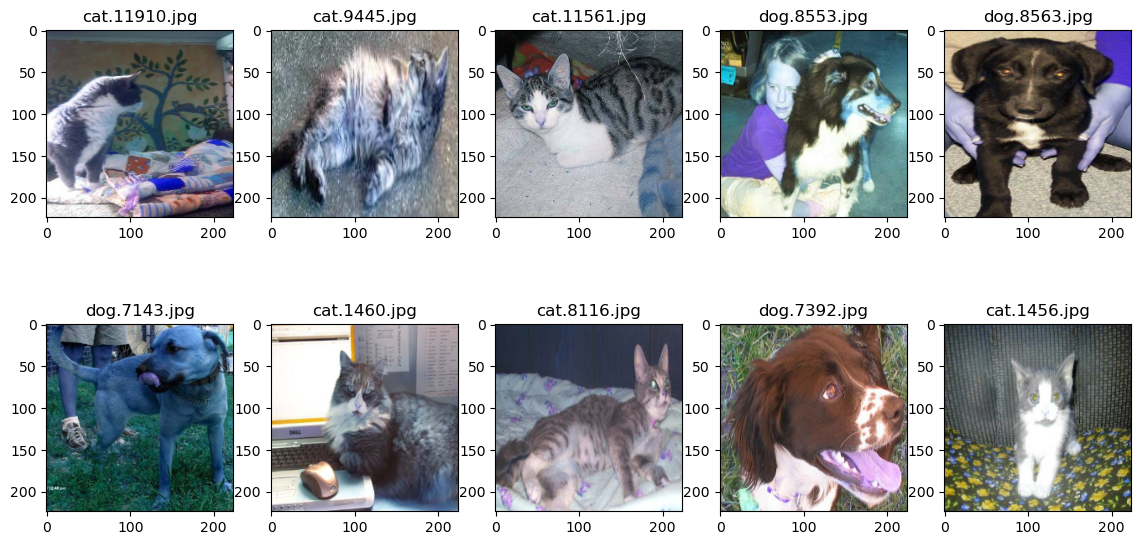

In [19]:
#display random set of train images

pic_set = np.random.choice(train_files,10).tolist()
for i, pic in enumerate (pic_set):
    pic = pic.split(".")[0] + "/" + pic
    pic_set[i]= pic

fig = plt.figure(figsize=(14, 7))
for i, pic in enumerate(pic_set, start=1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % pic.split("/")[1])
    img = cv2.imread(os.path.join(train_path,pic))
    img = cv2.resize(img, img_shape[:2])
    plt.imshow(img)

In [6]:
base_model = vgg19.VGG19 (include_top = False, 
                              weights = 'imagenet', 
                              input_shape=(img_shape))

In [7]:
base_model.trainable=False

In [8]:
model = keras.models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')], 
    name= base_model.name)

In [9]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss)
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        25,089 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,049,473 (76.48 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [28]:
fit_model = model.fit(train_gen,
            validation_data = val_gen,
            callbacks=[early_stoping,learning_rate_reduction],
            epochs=10,
            steps_per_epoch = 200,
            validation_steps = 100)
            # steps_per_epoch = train_gen.n//train_gen.batch_size,
            # validation_steps = val_gen.n//val_gen.batch_size)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1455s 7s/step - accuracy: 0.8253 - loss: 0.3698 - val_accuracy: 0.9069 - val_loss: 0.2349 - learning_rate: 0.0010
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1222s 6s/step - accuracy: 0.9007 - loss: 0.2209 - val_accuracy: 0.8967 - val_loss: 0.2228 - learning_rate: 0.0010
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1441s 7s/step - accuracy: 0.9241 - loss: 0.1878 - val_accuracy: 0.9156 - val_loss: 0.2020 - learning_rate: 0.0010
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.9388 - loss: 0.1494 - val_accuracy: 0.9172 - val_loss: 0.1959 - learning_rate: 0.0010
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1470s 7s/step - accuracy: 0.9309 - loss: 0.1681 - val_accuracy: 0.9216 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1244s 6s/step - accuracy: 0.9348 - loss: 0.1576 - val_accuracy: 0.9189 - val_loss: 0.1933 - learning_rate: 0.0010
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1437s 7s/step - accuracy: 0.9519 - lo

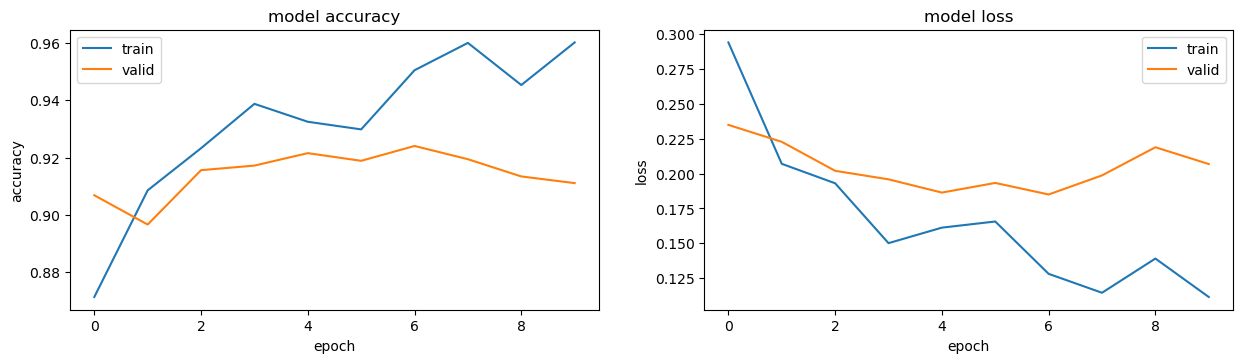

In [29]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_model.history['accuracy'])  
plt.plot(fit_model.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_model.history['loss'])  
plt.plot(fit_model.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [30]:
model.save('cats-dogs-vgg16_V5.hdf5')
model.save('cats-dogs-vgg16_V5.keras')

In [11]:
from tensorflow.keras.models import load_model
model = load_model('cats-dogs-vgg16_V5.keras')

In [12]:
from glob import glob
test_files = glob('cats-n-dogs/test/test/*.jpg')
len(test_files)

6500

In [13]:
test_pred = model.predict(test_gen, steps=len(test_files))

6500/6500 ━━━━━━━━━━━━━━━━━━━━ 935s 143ms/step


In [14]:
res = list(zip(sorted(test_files), test_pred))
len(res)

6500

In [15]:
res

[('cats-n-dogs/test/test\\10000.jpg', array([0.9995689], dtype=float32)),
 ('cats-n-dogs/test/test\\10001.jpg', array([0.00015052], dtype=float32)),
 ('cats-n-dogs/test/test\\10002.jpg', array([0.00227543], dtype=float32)),
 ('cats-n-dogs/test/test\\10003.jpg', array([0.9999797], dtype=float32)),
 ('cats-n-dogs/test/test\\10004.jpg', array([0.26143977], dtype=float32)),
 ('cats-n-dogs/test/test\\10005.jpg', array([0.00053121], dtype=float32)),
 ('cats-n-dogs/test/test\\10006.jpg', array([0.00203666], dtype=float32)),
 ('cats-n-dogs/test/test\\10007.jpg', array([0.0024353], dtype=float32)),
 ('cats-n-dogs/test/test\\10008.jpg', array([0.00060726], dtype=float32)),
 ('cats-n-dogs/test/test\\10009.jpg', array([0.00265045], dtype=float32)),
 ('cats-n-dogs/test/test\\10010.jpg', array([0.99983835], dtype=float32)),
 ('cats-n-dogs/test/test\\10011.jpg', array([0.9999992], dtype=float32)),
 ('cats-n-dogs/test/test\\10012.jpg', array([0.02558183], dtype=float32)),
 ('cats-n-dogs/test/test\\100

In [97]:
import random

In [16]:
import re

with open('cats-n-dogs/test/submit_Kaggle2.csv', 'w') as dst:
    dst.write('id,label\n')
    # for path, score in zip(sorted(test_files), test_pred):
    for path, score in res:
        dst.write('%s,%f\n' % (re.search('(\d+).jpg$', path).group(1), score))